In [3]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [4]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [34]:
Nrep=100
r=2 # local Hilbert space dim

Lab=8
Lc=6
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab

neg=np.zeros(Nrep)
v1b=np.zeros((Nrep*Nab,int(Lab/2)))

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    i_r
    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    
    for i_n in range(int(Lab/2)):
        Na=r**(i_n+1)
        Nb=r**(Lab-i_n-1)
        rT2b = p_transpose_2(rho,Na,Nb)
        l1T=np.linalg.eigvalsh(rT2b)
        v1b[i_r*Nab:(i_r+1)*Nab,i_n] = (Nab)*l1T

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 1.39 sec


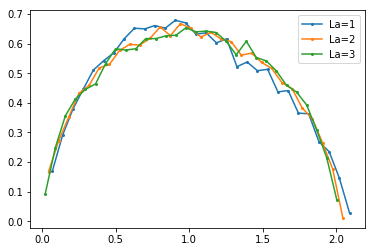

In [37]:
num_bins = 30

plt.figure()
# for i_n in range(int(Lab/2)):
for i_n in range(0,int(Lab/2)):
    n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

    plt.plot(bins_center,n,'o-',markersize=2,label='La=%d' % (i_n+1))

plt.legend()
# plt.ylim(0,0.3)
plt.show()


In [ ]:
plt.imshow(np.abs(rho-np.diag(rho)));

In [2]:
Nrep=1
r=2 # local Hilbert space dim

La=10
Lb=La
L=30
Lc=L-La-Lb

Na=r**La
Nb=r**Lb
Nab=Na*Nb
Nc=r**Lc
N= Na*Nb*Nc

dims = [r] * L
dims_ab = [r] * (La+Lb)
N = prod(dims)

# v1_q=np.zeros(Nrep*Nb*Na)
neg_q=np.zeros(Nrep)

t_timer=time.time()
np.random.seed(1)

for i_r in range(Nrep):
    i_r

    psi = rand_ket(N)
#     psi= rand_haar_state(N)
#     rho_ab = ptr(psi, dims=dims, keep=np.arange(Lc,L))
#     rT=partial_transpose(rho_ab, dims=dims_ab, sysa=np.arange(La))
#     lT_q=np.linalg.eigvalsh(rT)
#     v1_q[i_r*Nab:(i_r+1)*Nab] = Nab*lT_q

#     rTb=partial_transpose(rho_ab, dims=dims_ab, sysa=np.arange(La,La+Lb))
#     lT_b=np.linalg.eigvalsh(rTb)

#     neg_q[i_r]=logneg( rho_ab, dims=dims_ab, sysa=np.arange(La) )
#     neg_q[i_r]=logneg_subsys(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,La+Lb))
    neg_q[i_r]=logneg_subsys_approx(psi, dims=dims, sysa=np.arange(La), sysb=np.arange(La,La+Lb))

    
elapsed = time.time() - t_timer
print("Finished, quimb elapsed time = %.2f " % (elapsed)+ "sec")

print(neg_q)

Finished, quimb elapsed time = 153.88 sec
[0.]


In [ ]:
# plt.figure()
# # plt.plot(l1T,'o')
# plt.plot(lT_b[:100],'o')
# plt.plot(lT_q[:100],'x')
# plt.show()

In [ ]:
num_bins = 30

n, bin_edges = np.histogram(v1b, bins=num_bins)
bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

n_q, bin_edges_q = np.histogram(v1_q, bins=num_bins)
bins_center_q= (bin_edges_q[0:num_bins]+ bin_edges_q[1:])/2
n_q= n_q/np.sum(n_q)/(bin_edges_q[1]-bin_edges_q[0])


plt.figure()
plt.plot(bins_center,n,'o-',markersize=2)
plt.plot(bins_center_q,n_q,'v-',markersize=2)
plt.show()
# print(n.shape,bins.shape)